#### training data 로부터 20% 비율로 validation data 분리

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [5]:
class DataGeneration:
    
    # target_position = 0 (첫번째열이 정답데이터), target_position=-1 (마지막열이 정답데이터)
    def __init__(self, name, file_path, seperation_rate, target_position=-1):
        
        self.name = name
        
        self.file_path = file_path
        
        self.seperation_rate = seperation_rate
        
        if (target_position == -1  or  target_position == 0):      
            self.target_position = target_position
        
        else:
            err_str = 'target_position must be -1 or 0'            
            raise Exception(err_str)    
            
    
    # print data target distribution 
    # str_of_kind : 'original data' or  'training data'  or  'test data'
    def __display_target_distribution(self, data, str_of_kind='original data'):
        
        print('=======================================================================================================')
        
        target_data = data[ :, self.target_position ]
        
        # numpy.unique() 사용하여 loaded data target 분포 확인
        unique, counts = np.unique(target_data, return_counts=True)

        unique_target = []
    
        for index in range(len(unique)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique[index], ', count = ', counts[index])
        
            unique_target.append(unique[index])

        for index in range(len(unique_target)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique_target[index], ', ratio = ', np.round(100 * counts[index] / (target_data.shape[0]), 2), ' %')
    
        print('=======================================================================================================')
        
        
    # numpy.random.shuffle()  이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        try:
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
            
        except Exception as err:
            print('[DataGeneration::generate()]  ', str(err))
            raise Exception(str(err))

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
            
        # print the target distribution of original data 
        
        self.__display_target_distribution(loaded_data, 'original data')
        
        
        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        # numpy.random.shuffle 을 이용하여 랜덤하게 데이터 섞기
        np.random.shuffle(loaded_data)
        
        # test_data 는 0 : test_data_num
        
        
        test_data = loaded_data[ 0:test_data_num ]

        # training_data 는 test_data_num 부터 끝까지 
        training_data = loaded_data[ test_data_num: ]

        # display target distribution of generated data 
        
        self.__display_target_distribution(training_data, 'training data')
        
        self.__display_target_distribution(test_data, 'test data')
        
        return training_data, test_data

In [6]:
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2 = (784 X 100) Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3 = (100X10)  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)      
                        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])       
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
    def feed_forward(self):  
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )    
    
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )
   
    
    # 정확도 측정함수 
    def accuracy(self, test_input_data, test_target_data):
        
        matched_list = []
        not_matched_list = []
        
        
        for index in range(len(test_input_data)):
                        
            label = int(test_target_data[index])
                        
            # one-hot encoding을 위한 데이터 정규화 (data normalize)
            data = (test_input_data[index] / 255.0 * 0.99) + 0.01
                  
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            predicted_num = self.predict(np.array(data, ndmin=2)) 
        
            if label == predicted_num:
                matched_list.append(index)
                
            else:
                
                not_matched_list.append(index)
                
                
        #print("Current Accuracy = ", (len(matched_list)/(len(test_input_data))) )
        
        accuracy_val = (len(matched_list)/(len(test_input_data)))
        
        return accuracy_val, not_matched_list
    
    
    def train(self, input_data, target_data):   # input_data : 784 개, target_data : 10개
        
        self.target_data = target_data    
        self.input_data = input_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_3 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)   
        
        self.b3 = self.b3 - self.learning_rate * loss_3  
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)   
        
        self.b2 = self.b2 - self.learning_rate * loss_2
        
    def predict(self, input_data):        # input_data 는 행렬로 입력됨 즉, (1, 784) shape 을 가짐        
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = sigmoid(Z3)
        
        predicted_num = np.argmax(A3)
    
        return predicted_num

#### validation 비율 0.2

In [7]:
# DataGeneration class 이용하여 training data , validation data 생성
seperation_rate = 0.2  # training data 10 % 비율로 validation data 생성
target_position = 0    # 정답은 첫번째 열

try:
    data_obj = DataGeneration('MNIST', './mnist_train.csv', seperation_rate, target_position)

    (training_data, validation_data) = data_obj.generate()
    
    print("training_data.shape = ", training_data.shape)
    print("validation_data.shape = ", validation_data.shape)

except Exception as err:
    print('Exception Occur !!')
    print(str(err))

[DataGeneration]  loaded_data.shape =  (60000, 785)
[DataGeneration] unique number of original data =  0.0 , count =  5923
[DataGeneration] unique number of original data =  1.0 , count =  6742
[DataGeneration] unique number of original data =  2.0 , count =  5958
[DataGeneration] unique number of original data =  3.0 , count =  6131
[DataGeneration] unique number of original data =  4.0 , count =  5842
[DataGeneration] unique number of original data =  5.0 , count =  5421
[DataGeneration] unique number of original data =  6.0 , count =  5918
[DataGeneration] unique number of original data =  7.0 , count =  6265
[DataGeneration] unique number of original data =  8.0 , count =  5851
[DataGeneration] unique number of original data =  9.0 , count =  5949
[DataGeneration] unique number of original data =  0.0 , ratio =  9.87  %
[DataGeneration] unique number of original data =  1.0 , ratio =  11.24  %
[DataGeneration] unique number of original data =  2.0 , ratio =  9.93  %
[DataGeneration

#### 은닉층 노드 100 개 인 경우의 MNIST 오차역전파 

In [8]:
# hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 100     # hidden 1 nodes
o_nodes = 10       # output nodes
lr = 0.1           # learning rate
epochs = 20         # epochs

# 손실함수 값을 저장할 list 생성
loss_val_list = []

# 정확도 저장 리스트
training_accuracy_list = []
validation_accuracy_list = []

# 객체 생성
nn = NeuralNetwork(i_nodes, h1_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
    
    for step in range(len(training_data)):  # train
    
        # input_data, target_data normalize        
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[step, 0])] = 0.99
    
        input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01
    
        nn.train( np.array(input_data, ndmin=2), np.array(target_data, ndmin=2) )
    
        if step % 1000 == 0:
            print("epochs = ", i+1, ", step = ", step,  ", current loss_val = ", nn.loss_val())
            
        # 손실함수 값 저장 per step
        loss_val_list.append(nn.loss_val())    
        
    # 정확도 계산 및 저장 per epochs
    (training_accuracy, not_matched_list) = nn.accuracy(training_data[:, 1:], training_data[:, 0])
    (validation_accuracy, not_matched_list) = nn.accuracy(validation_data[:, 1:], validation_data[:, 0])
        
    training_accuracy_list.append(training_accuracy)
    validation_accuracy_list.append(validation_accuracy)
        
        
end_time = datetime.now() 
print("\nelapsed time = ", end_time - start_time) 

epochs =  1 , step =  0 , current loss_val =  8.7723781167449
epochs =  1 , step =  1000 , current loss_val =  1.282195969069911
epochs =  1 , step =  2000 , current loss_val =  0.8099511855620258
epochs =  1 , step =  3000 , current loss_val =  1.2983634141192513
epochs =  1 , step =  4000 , current loss_val =  0.8565900947702215
epochs =  1 , step =  5000 , current loss_val =  0.8587066606838726
epochs =  1 , step =  6000 , current loss_val =  1.0133768380118953
epochs =  1 , step =  7000 , current loss_val =  0.9120218202053497
epochs =  1 , step =  8000 , current loss_val =  0.6632417579355425
epochs =  1 , step =  9000 , current loss_val =  0.8734468636958455
epochs =  1 , step =  10000 , current loss_val =  0.8212222492896591
epochs =  1 , step =  11000 , current loss_val =  3.0606437685618624
epochs =  1 , step =  12000 , current loss_val =  0.9371317453162993
epochs =  1 , step =  13000 , current loss_val =  0.7737534693843096
epochs =  1 , step =  14000 , current loss_val =  0

epochs =  3 , step =  24000 , current loss_val =  0.9631493593569095
epochs =  3 , step =  25000 , current loss_val =  0.8450195678246284
epochs =  3 , step =  26000 , current loss_val =  0.9114358987318151
epochs =  3 , step =  27000 , current loss_val =  0.941447584611931
epochs =  3 , step =  28000 , current loss_val =  0.8765357703398118
epochs =  3 , step =  29000 , current loss_val =  0.7832707213699772
epochs =  3 , step =  30000 , current loss_val =  0.8005643504673734
epochs =  3 , step =  31000 , current loss_val =  0.7946348473729756
epochs =  3 , step =  32000 , current loss_val =  0.800134963728288
epochs =  3 , step =  33000 , current loss_val =  0.9509132503395402
epochs =  3 , step =  34000 , current loss_val =  0.8501748898367603
epochs =  3 , step =  35000 , current loss_val =  0.7962703263660618
epochs =  3 , step =  36000 , current loss_val =  0.8064081829079447
epochs =  3 , step =  37000 , current loss_val =  0.8052307978098412
epochs =  3 , step =  38000 , curren

epochs =  6 , step =  0 , current loss_val =  0.9953509780554791
epochs =  6 , step =  1000 , current loss_val =  0.7255176170820067
epochs =  6 , step =  2000 , current loss_val =  0.7521277563621075
epochs =  6 , step =  3000 , current loss_val =  1.0071778650490695
epochs =  6 , step =  4000 , current loss_val =  0.8356938891396724
epochs =  6 , step =  5000 , current loss_val =  0.9222809241861726
epochs =  6 , step =  6000 , current loss_val =  0.8692058745323015
epochs =  6 , step =  7000 , current loss_val =  0.8689735299856678
epochs =  6 , step =  8000 , current loss_val =  0.8908211002634496
epochs =  6 , step =  9000 , current loss_val =  0.8048277888612997
epochs =  6 , step =  10000 , current loss_val =  0.9077067008543553
epochs =  6 , step =  11000 , current loss_val =  3.627363058476475
epochs =  6 , step =  12000 , current loss_val =  0.9255601377045242
epochs =  6 , step =  13000 , current loss_val =  0.9153486028300534
epochs =  6 , step =  14000 , current loss_val =

epochs =  8 , step =  24000 , current loss_val =  0.9667413107910082
epochs =  8 , step =  25000 , current loss_val =  0.904512664077512
epochs =  8 , step =  26000 , current loss_val =  0.9300834518151766
epochs =  8 , step =  27000 , current loss_val =  0.961503721333678
epochs =  8 , step =  28000 , current loss_val =  0.9029229424799249
epochs =  8 , step =  29000 , current loss_val =  0.8264880539100566
epochs =  8 , step =  30000 , current loss_val =  0.9100496525176933
epochs =  8 , step =  31000 , current loss_val =  0.8514357645365421
epochs =  8 , step =  32000 , current loss_val =  0.8522357879704803
epochs =  8 , step =  33000 , current loss_val =  0.8633968633815472
epochs =  8 , step =  34000 , current loss_val =  0.8949568067888061
epochs =  8 , step =  35000 , current loss_val =  0.8393690666508203
epochs =  8 , step =  36000 , current loss_val =  0.8594924394417033
epochs =  8 , step =  37000 , current loss_val =  0.8578942479665022
epochs =  8 , step =  38000 , curren

epochs =  10 , step =  47000 , current loss_val =  0.7957366475609279
epochs =  11 , step =  0 , current loss_val =  0.9596026754538809
epochs =  11 , step =  1000 , current loss_val =  0.7845129783812418
epochs =  11 , step =  2000 , current loss_val =  0.8005684439047862
epochs =  11 , step =  3000 , current loss_val =  1.00761960595207
epochs =  11 , step =  4000 , current loss_val =  0.8442397249201999
epochs =  11 , step =  5000 , current loss_val =  0.9966139649481867
epochs =  11 , step =  6000 , current loss_val =  0.9828946617090916
epochs =  11 , step =  7000 , current loss_val =  0.9165231883768119
epochs =  11 , step =  8000 , current loss_val =  0.9651783419743727
epochs =  11 , step =  9000 , current loss_val =  0.8544539313654584
epochs =  11 , step =  10000 , current loss_val =  0.9006870895482864
epochs =  11 , step =  11000 , current loss_val =  1.7204667227781454
epochs =  11 , step =  12000 , current loss_val =  0.8631694747413836
epochs =  11 , step =  13000 , curr

epochs =  13 , step =  21000 , current loss_val =  1.0003285835650935
epochs =  13 , step =  22000 , current loss_val =  0.9340733175512242
epochs =  13 , step =  23000 , current loss_val =  0.8660387555422485
epochs =  13 , step =  24000 , current loss_val =  0.9387243783357003
epochs =  13 , step =  25000 , current loss_val =  0.982208740953725
epochs =  13 , step =  26000 , current loss_val =  0.9549734146083758
epochs =  13 , step =  27000 , current loss_val =  0.961876113702169
epochs =  13 , step =  28000 , current loss_val =  0.9634613008564663
epochs =  13 , step =  29000 , current loss_val =  0.8992344079608675
epochs =  13 , step =  30000 , current loss_val =  0.9954262421850224
epochs =  13 , step =  31000 , current loss_val =  0.9030026535427267
epochs =  13 , step =  32000 , current loss_val =  0.8917162960554996
epochs =  13 , step =  33000 , current loss_val =  0.862759556607229
epochs =  13 , step =  34000 , current loss_val =  0.9576815251285968
epochs =  13 , step =  

epochs =  15 , step =  43000 , current loss_val =  1.03321560793516
epochs =  15 , step =  44000 , current loss_val =  0.9095997195465314
epochs =  15 , step =  45000 , current loss_val =  0.9817197556574976
epochs =  15 , step =  46000 , current loss_val =  0.9245130022278208
epochs =  15 , step =  47000 , current loss_val =  0.8475893286373191
epochs =  16 , step =  0 , current loss_val =  1.0027504926075268
epochs =  16 , step =  1000 , current loss_val =  0.8247834507593954
epochs =  16 , step =  2000 , current loss_val =  0.8485523025327746
epochs =  16 , step =  3000 , current loss_val =  0.9892388956170545
epochs =  16 , step =  4000 , current loss_val =  0.8779965111234033
epochs =  16 , step =  5000 , current loss_val =  1.0432649738094264
epochs =  16 , step =  6000 , current loss_val =  1.0542551775792068
epochs =  16 , step =  7000 , current loss_val =  0.9732701217634998
epochs =  16 , step =  8000 , current loss_val =  1.040493867276477
epochs =  16 , step =  9000 , curre

epochs =  18 , step =  17000 , current loss_val =  0.9949787015604887
epochs =  18 , step =  18000 , current loss_val =  1.1431054920898012
epochs =  18 , step =  19000 , current loss_val =  0.9522116130865783
epochs =  18 , step =  20000 , current loss_val =  1.0222958997930212
epochs =  18 , step =  21000 , current loss_val =  1.041892214960781
epochs =  18 , step =  22000 , current loss_val =  0.9792821105628692
epochs =  18 , step =  23000 , current loss_val =  0.9122025459864983
epochs =  18 , step =  24000 , current loss_val =  0.9696745580286554
epochs =  18 , step =  25000 , current loss_val =  1.0401161683193192
epochs =  18 , step =  26000 , current loss_val =  0.9726147250403181
epochs =  18 , step =  27000 , current loss_val =  0.9752585310036426
epochs =  18 , step =  28000 , current loss_val =  1.0034828362019579
epochs =  18 , step =  29000 , current loss_val =  0.9610372771987798
epochs =  18 , step =  30000 , current loss_val =  1.0701061990489287
epochs =  18 , step =

epochs =  20 , step =  39000 , current loss_val =  0.977851183759467
epochs =  20 , step =  40000 , current loss_val =  2.5471512509443612
epochs =  20 , step =  41000 , current loss_val =  1.0432190309282539
epochs =  20 , step =  42000 , current loss_val =  1.0977325645399367
epochs =  20 , step =  43000 , current loss_val =  1.0832686033874253
epochs =  20 , step =  44000 , current loss_val =  0.9480667943916853
epochs =  20 , step =  45000 , current loss_val =  1.021735739714861
epochs =  20 , step =  46000 , current loss_val =  0.9833008686392541
epochs =  20 , step =  47000 , current loss_val =  0.8863933216002168

elapsed time =  0:15:16.054885


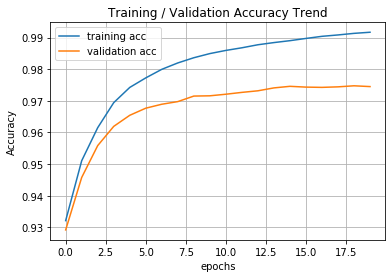

In [9]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(training_accuracy_list)
plt.plot(validation_accuracy_list)
plt.legend(['training acc', 'validation acc'])

plt.show()

In [10]:
# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 test data 읽어옴
test_data = np.loadtxt('./mnist_test.csv', delimiter=',', dtype=np.float32)

test_input_data = test_data[ : , 1: ]
test_target_data = test_data[ : , 0 ]

print("test_data.shape = ", test_data.shape)
print("test_data[0,0] = ", test_data[0,0], ", len(test_data[0]) = ", len(test_data[0]))

# measure accuracy
(accuracy_ret, false_list) = nn.accuracy(test_input_data, test_target_data)   

print('Accuracy = ', np.round(100*accuracy_ret, 3), ' %')

test_data.shape =  (10000, 785)
test_data[0,0] =  7.0 , len(test_data[0]) =  785
Accuracy =  97.4  %


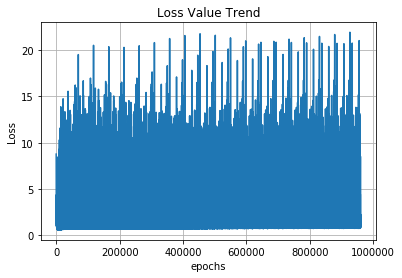

In [11]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

#### 최대손실값 / 최소손실값 확인

In [12]:
max_loss = np.max(loss_val_list)
min_loss = np.min(loss_val_list)
max_loss_index = np.argmax(loss_val_list)
min_loss_index = np.argmin(loss_val_list)

print("max_loss = ", max_loss, ", max_loss_index = ", max_loss_index, ", min_loss = ", min_loss, ", min_loss_index = ", min_loss_index)

epochs_num = int(max_loss_index/len(training_data))
print('epochs_num = ', epochs_num)

if max_loss_index > len(training_data):
    real_max_loss_index = max_loss_index-epochs_num*len(training_data)
else:
    real_max_loss_index = max_loss_index
    

if min_loss_index > len(training_data):
    real_min_loss_index = min_loss_index-epochs_num*len(training_data)
else:
    real_min_loss_index = min_loss_index
    


print('real_max_index = ', real_max_loss_index, ', real_min_index = ', real_min_loss_index)  # real_min_loss_index 다시 계산

max_loss =  21.927579584672216 , max_loss_index =  926503 , min_loss =  0.5852124065792236 , min_loss_index =  4296
epochs_num =  19
real_max_index =  14503 , real_min_index =  4296


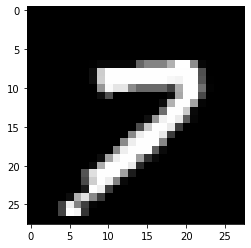

label =  4
prediction =  7


In [13]:
# check max loss data
import matplotlib.pyplot as plt
%matplotlib inline

img = training_data[real_max_loss_index, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

target = int(training_data[real_max_loss_index, 0])

input_data = (training_data[real_max_loss_index, 1:] / 255.0 * 0.99) + 0.01

predicted_num = nn.predict(np.array(input_data, ndmin=2))

print('label = ', target)
print('prediction = ', predicted_num)

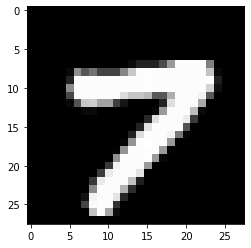

label =  7
prediction =  7


In [14]:
# check min loss data
import matplotlib.pyplot as plt
%matplotlib inline

img = training_data[real_min_loss_index, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

target = int(training_data[real_min_loss_index, 0])

input_data = (training_data[real_min_loss_index, 1:] / 255.0 * 0.99) + 0.01

predicted_num = nn.predict(np.array(input_data, ndmin=2))

print('label = ', target)
print('prediction = ', predicted_num)